<a href="https://colab.research.google.com/github/asetya/BigData/blob/master/CNN_Cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN with CIFAR DATASET 

sumber : https://www.analyticsvidhya.com/blog/2020/02/learn-image-classification-cnn-convolutional-neural-networks-3-datasets/

CIFAR-10 adalah dataset citra  yang terdiri dari 60.000 gambar ukuran 32x32 

terdiri dari 50.000 training dan 10.000 testing 

Kita akan mencoba arsitektur CNN sederhana untuk mengelompokan (klasifikasi) gambar menjadi 10 kelas 

**Download Dataset**

In [1]:
from keras.datasets import cifar10
# loading the dataset 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


**Import Library** 

In [3]:
# keras imports for the dataset and building our neural network

from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils



**Menyiapkan dataset** 

In [1]:
# # building the input vector from the 32x32 pixels
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)




NameError: ignored

**Membuat Model**

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 50)        1400      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 75)        33825     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 75)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 75)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 125)       84500     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 125)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 8, 8, 125)        

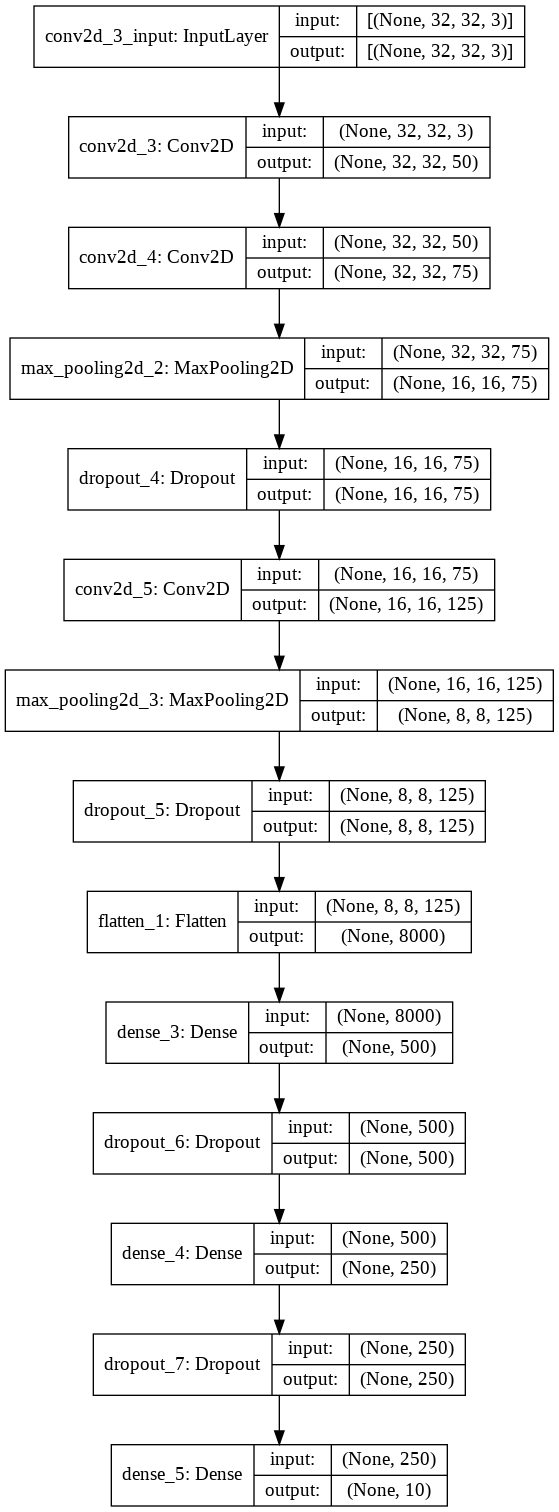

In [5]:
# building a linear stack of layers with the sequential model
from keras.utils.vis_utils import plot_model
model = Sequential()

# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

#menampilkan model 
print(model.summary())
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Model yang dibangun terdiri dari beberapa layer dan dengan jumlah parameter pada masing masing  layer misal untuk layer 1, adalah layer konvolusi 2 dimensi dengan keluaran 32 x 32 x 50. 

Jika kita lihat pada saat pembangunan model untuk layer 1 



```
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))
```
Jadi di layer ini ada konvolusi 2 dimensi dengan kernek sebanyak 50, masing masing kernel berukuran 3 x 3 dengan stride (lompatan) kernel pada saat konvolusi adalah 1 ke kanan 1 ke bawah (1,1) padding nya same artinya ukuran masukan dan ukuran keluaran sama (32x32) masukannya adalah image 32x32x3 (ukurapn lebar 32, tinggi 32 terdapat 3 sinyal warna R,G dan B) 
Jumlah parameter = 1400 berasal dari ((3 x 3 x 3)+1) x 50 = 28 x 50 = 1400 
3 x 3 ukuran kernel, x 3 karena butuh 3 lapis untuk tiap kernel untuk dikonvolusi dengan lapisan gambar R,G,B di tambah 1 karena untuk setiap konvolusi ada 1 nilai bias yang ditambahkan. 






**Melakukan Training dan Validasi**

In [5]:
# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
391/391 [==============================] - 376s 927ms/step - loss: 1.8615 - accuracy: 0.3051 - val_loss: 1.1985 - val_accuracy: 0.5792
Epoch 2/10
391/391 [==============================] - 367s 939ms/step - loss: 1.1458 - accuracy: 0.5886 - val_loss: 0.9073 - val_accuracy: 0.6897
Epoch 3/10
391/391 [==============================] - 370s 948ms/step - loss: 0.9169 - accuracy: 0.6764 - val_loss: 0.7920 - val_accuracy: 0.7260
Epoch 4/10
391/391 [==============================] - 367s 938ms/step - loss: 0.7929 - accuracy: 0.7226 - val_loss: 0.7366 - val_accuracy: 0.7509
Epoch 5/10
391/391 [==============================] - 366s 936ms/step - loss: 0.7043 - accuracy: 0.7523 - val_loss: 0.7001 - val_accuracy: 0.7624
Epoch 6/10
391/391 [==============================] - 366s 937ms/step - loss: 0.6381 - accuracy: 0.7780 - val_loss: 0.6743 - val_accuracy: 0.7685
Epoch 7/10
391/391 [==============================] - 365s 935ms/step - loss: 0.5756 - accuracy: 0.8009 - val_loss: 0.6719 -

Dengan 10 epoch (iterasi) didapati model dengan akurasi training 84.25% dan akurasi validasi terbaik 78.11%

additional explanation 
https://towardsdatascience.com/understanding-and-calculating-the-number-of-parameters-in-convolution-neural-networks-cnns-fc88790d530d